# Decision Tree (with bank.xlsx dataset)

##### Importing the assential libraries 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [21]:
bank = pd.read_excel('bank.xlsx')
bank.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


#### Data Analysis

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 age           4521 non-null int64
 job           4521 non-null object
 marital       4521 non-null object
 education     4521 non-null object
 default       4521 non-null object
 balance       4521 non-null int64
 housing       4521 non-null object
 loan          4521 non-null object
 contact       4521 non-null object
 day           4521 non-null int64
 month         4521 non-null object
 duration      4521 non-null int64
 campaign      4521 non-null int64
 pdays         4521 non-null int64
 previous      4521 non-null int64
 poutcome      4521 non-null object
 y             4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
bank.columns

Index([' age', ' job ', ' marital ', ' education ', ' default ', ' balance ',
       ' housing ', ' loan ', ' contact ', ' day ', ' month ', ' duration ',
       ' campaign ', ' pdays ', ' previous ', ' poutcome ', ' y'],
      dtype='object')

In [11]:
np.unique(bank[' education '])

array([' primary ', ' secondary ', ' tertiary ', ' unknown '],
      dtype=object)

In [12]:
np.unique(bank[' job '])

array([' admin. ', ' blue-collar ', ' entrepreneur ', ' housemaid ',
       ' management ', ' retired ', ' self-employed ', ' services ',
       ' student ', ' technician ', ' unemployed ', ' unknown '],
      dtype=object)

In [13]:
np.unique(bank[' marital '])

array([' divorced ', ' married ', ' single '], dtype=object)

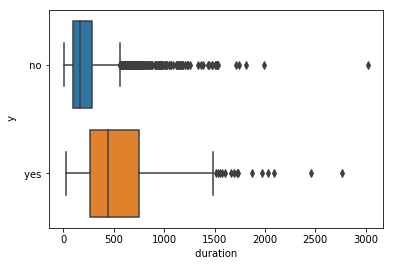

In [18]:
sb.boxplot(x=' duration ',y=' y',data=bank)

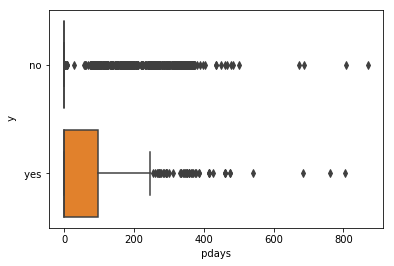

In [20]:
sb.boxplot(x=' pdays ',y=' y',data=bank)

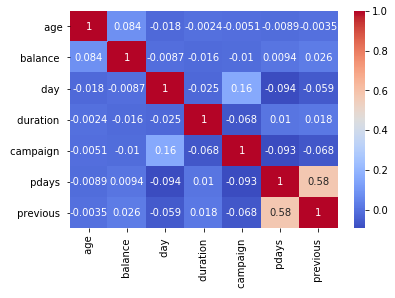

In [22]:
sb.heatmap(bank.corr(),cmap='coolwarm',annot=True)

#### Data handling and data-cleaning

In [23]:
bank.columns

Index([' age', ' job ', ' marital ', ' education ', ' default ', ' balance ',
       ' housing ', ' loan ', ' contact ', ' day ', ' month ', ' duration ',
       ' campaign ', ' pdays ', ' previous ', ' poutcome ', ' y'],
      dtype='object')

In [24]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [25]:
Job = pd.get_dummies(bank[' job '],drop_first=True)
Job.head(2)

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0


In [26]:
Marital = pd.get_dummies(bank[' marital '],drop_first=True)

In [27]:
Education = pd.get_dummies(bank[' education '],drop_first=True)

In [31]:
Default = pd.get_dummies(bank[' default '],drop_first=True)


In [32]:
Housing = pd.get_dummies(bank[' housing '],drop_first=True)

In [33]:
Loan = pd.get_dummies(bank[' loan '],drop_first=True)

In [34]:
bank = pd.concat([bank,Job,Marital,Education,Default,Housing,Loan],axis=1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,unemployed,unknown,married,single,secondary,tertiary,unknown,yes,yes,yes
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,1,0,1,0,0,0,0,0,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,1,0,1,0,0,0,1,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,0,0,1,0,1,0,0,1,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,0,0,1,0,0,1,0,0,1,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0,0,1,0,1,0,0,0,1,0


In [35]:
bank.columns

Index([' age', ' job ', ' marital ', ' education ', ' default ', ' balance ',
       ' housing ', ' loan ', ' contact ', ' day ', ' month ', ' duration ',
       ' campaign ', ' pdays ', ' previous ', ' poutcome ', ' y',
       ' blue-collar ', ' entrepreneur ', ' housemaid ', ' management ',
       ' retired ', ' self-employed ', ' services ', ' student ',
       ' technician ', ' unemployed ', ' unknown ', ' married ', ' single ',
       ' secondary ', ' tertiary ', ' unknown ', ' yes ', ' yes ', ' yes '],
      dtype='object')

In [36]:
bank.drop([' job ', ' marital ', ' education ', ' default ',' housing ', ' loan ', ' contact ', ' day ', ' month ',' previous ', ' poutcome '],axis=1,inplace=True)
bank.head()

,age,balance,duration,campaign,pdays,y,blue-collar,entrepreneur,housemaid,management,...,unemployed,unknown,married,single,secondary,tertiary,unknown,yes,yes,yes
0,30,1787,79,1,-1,no,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,33,4789,220,1,339,no,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
2,35,1350,185,1,330,no,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
3,30,1476,199,4,-1,no,0,0,0,1,...,0,0,1,0,0,1,0,0,1,1
4,59,0,226,1,-1,no,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [38]:
X = bank.drop(' y',axis=1)
y = bank[' y']

In [43]:
Y = pd.get_dummies(y,drop_first=True)
Y.head()

,yes
0,0
1,0
2,0
3,0
4,0


#### Spliting of Training and testing dataset

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# *Training of the model with the help of*  **CART(Gini Index)** Algorithm

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtree = DecisionTreeClassifier()

In [49]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Predictions

In [50]:
predictions = dtree.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [71]:
cla_CART = classification_report(y_test,predictions)
print("Classification Report:\n\n",cla_CART)

Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1205
           1       0.34      0.42      0.38       152

   micro avg       0.84      0.84      0.84      1357
   macro avg       0.63      0.66      0.64      1357
weighted avg       0.86      0.84      0.85      1357



In [72]:
con_CART = confusion_matrix(y_test,predictions)
print("Confusion matrix:\n\n",con_CART)

Confusion matrix:

 [[1080  125]
 [  88   64]]


In [74]:
acc_CART = accuracy_score(y_test,predictions)*100
print("Accuracy:",acc_CART,"%")

Accuracy: 84.3036109064112 %


# *Training of the model with the help of*  **ID3(Entropy) Algorithm**

In [75]:
dtree = DecisionTreeClassifier(criterion='entropy')

In [76]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Prediction for ID3

In [77]:
predictions = dtree.predict(X_test)

In [78]:
cla_ID3 = classification_report(y_test,predictions)
print("Classification Report:\n\n",cla_ID3)

Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1205
           1       0.33      0.41      0.37       152

   micro avg       0.84      0.84      0.84      1357
   macro avg       0.63      0.65      0.64      1357
weighted avg       0.86      0.84      0.85      1357



In [79]:
con_ID3 = confusion_matrix(y_test,predictions)
print("Confusion matrix:\n\n",con_ID3)

Confusion matrix:

 [[1080  125]
 [  90   62]]


In [80]:
acc_ID3 = accuracy_score(y_test,predictions)*100
print("Accuracy:",acc_ID3,"%")

Accuracy: 84.15622697126012 %
